<h1 style="text-align: center;">Machine Learning and Statistics Project </h1>

 ***
 
 Author: Brid Kennedy
 
 Date: December 2023

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression



# Project Brief

## Overview
The project involves creating a notebook exploring classification algorithms applied to the iris flower dataset associated with Ronald A Fisher. The dataset is available from [UC Irvine](http://archive.ics.uci.edu/ml/datasets/Iris).

## Objectives
1. **Supervised Learning and Classification:**
   - Explain the concept of supervised learning.
   - Define classification algorithms.

2. **Implementation with scikit-learn:**
   - Describe at least one common classification algorithm.
   - Implement the chosen algorithm using the scikit-learn Python library.

3. **Visualization and Explanation:**
   - Use appropriate plots, mathematical notation, and diagrams to explain relevant concepts.



# Iris Classes Overview

Below are images of the three Iris classes for which data has been collected. Within the three classes of Iris, there are 50 measurements for each of the variables: sepal length, sepal width, petal length, and petal width. Sepals and Petals are labeled in the image below.

![Iris Classes](https://miro.medium.com/max/1400/1*nfK3vGZkTa4GrO7yWpcS-Q.png)

*Image sourced from [source](https://miro.medium.com/max/1400/1*nfK3vGZkTa4GrO7yWpcS-Q.png).*


# Supervised Learning and Classification 

## Introduction

In the field of machine learning, supervised learning is a technique for learning from labeled data. It involves training a model on a set of input data with known corresponding outputs, enabling the model to make predictions on new, unseen data. Classification is a specific type of supervised learning task that aims to classify data points into one of a finite set of categories.

## Supervised Learning

Supervised learning algorithms learn from labeled data, which consists of pairs of input data and their corresponding outputs. The algorithm analyzes the patterns in the data to identify relationships between the inputs and outputs. This allows the algorithm to make predictions on new, unseen data, assuming that the relationships observed in the training data hold true for the new data as well.

## Classification Algorithms
Classification algorithms are a subcategory of supervised learning algorithms that are specifically designed to assign data points to predefined categories. These algorithms learn from labeled data, identifying patterns that distinguish between different categories. When presented with new data, the algorithm estimates the probability of each category and assigns the data point to the category with the highest probability


# Classification Algorithms

### K-Nearest Neighbor (KNN)
KNN is a supervised learning technique used for classification and regression. In the context of classification, KNN predicts the label of a data point based on the labels of its nearest neighbors. It identifies the label of the data before making predictions. The algorithm utilizes measurements such as sepal length, sepal width, petal length, and petal width in the case of the Iris dataset. The number of neighbors can be user-defined (k-nearest neighbor learning) or vary based on the local density of points (radius-based neighbor learning).

*Reference: [scikit-learn documentation](https://scikit-learn.org/stable/modules/neighbors.html)*

### Support Vector Machine (SVM)
Support Vector Machine (SVM) is a powerful algorithm for both binary and multiclass classification tasks. It aims to find a hyperplane in N-dimensions that classifies data points. SVM is effective for the Iris dataset, where the goal is to classify iris flowers into different species. The algorithm maximizes the margin between classes, providing accurate predictions. The image below visualizes SVM applied to the Iris dataset:

![SVM image](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

### Naïve Bayes
Naïve Bayes is a fast and straightforward classification algorithm based on Bayes' theorem. It assumes that each variable contributes independently and equally to the outcome. Gaussian Naïve Bayes, a specific application, assumes features follow a normal distribution. While Naïve Bayes may not apply to all real-life problems, it is well-suited for multiclass classification tasks like the Iris dataset.

### Decision Tree
Decision Tree is a commonly used supervised learning technique for regression and classification. It involves drawing a tree figure where features are decision nodes, and outputs are leaf nodes. Decision Trees are known for their simplicity and interpretability. The algorithm uses methods like Gini index and information gain to select the best attributes. Here's an example of a Decision Tree:

![Decision tree example](https://scikit-learn.org/stable/_images/iris.svg)

### Random and Rotation Forest
Random Forest is an ensemble learning model composed of many decision trees, providing more accurate and stable predictions. Rotation Forest involves rotating the feature space to enhance the diversity of base learners. While Random Forest is more common, Rotation Forest can be explored for specific applications.

*References:*
- [scikit-learn documentation](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)
- [Ak, M.F. A Comparative Analysis of Breast Cancer Detection and Diagnosis Using Data Visualization and Machine Learning Applications. Healthcare 2020, 8, 111.](https://doi.org/10.3390/healthcare8020111)


### This project will examine a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results comparing the three algorithms on the Iris Dataset in this progect


# Visualise the Data

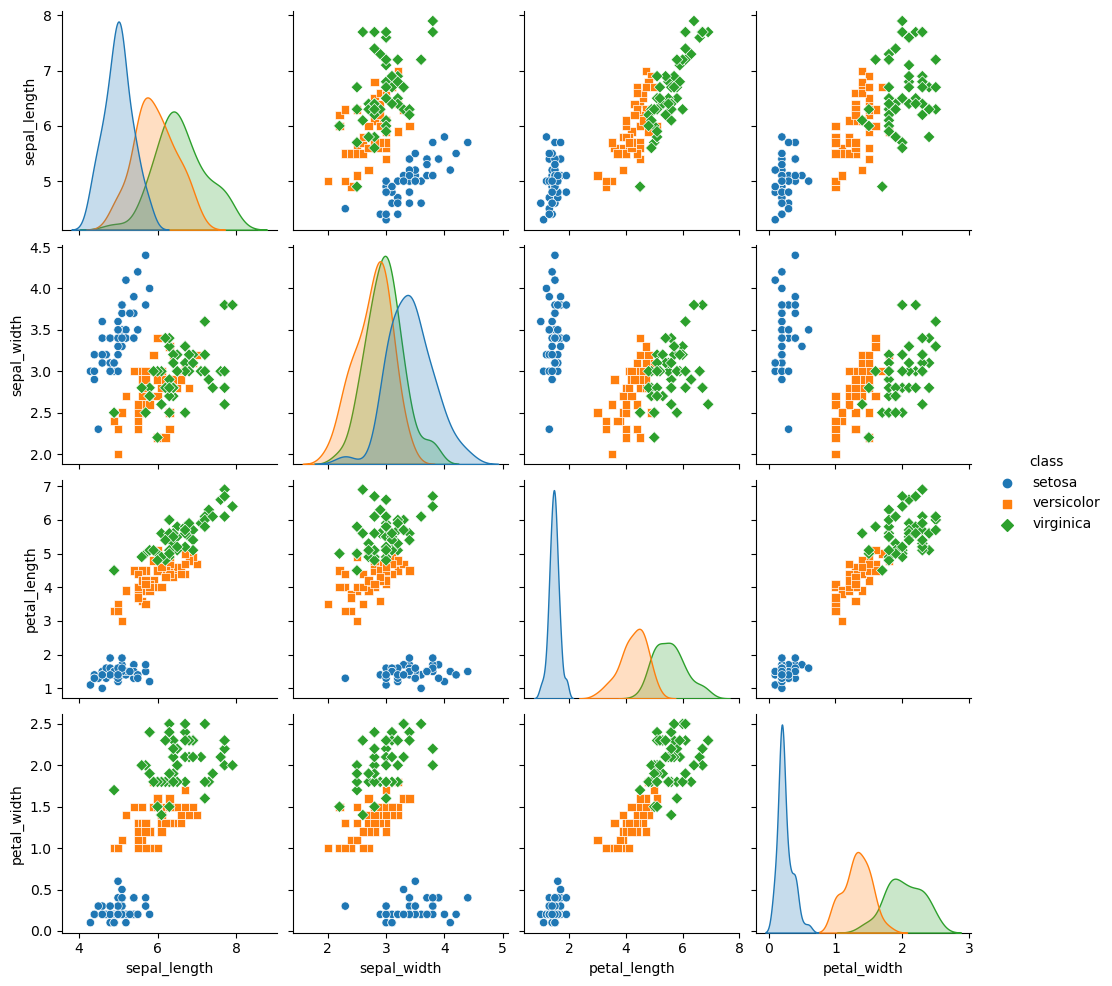

In [9]:
# Load the Iris dataset from the CSV file
iris_path = 'data/iris.csv' 
iris = pd.read_csv(iris_path)

# Pairplot to visualize relationships between features
sns.pairplot(iris, hue='class', markers=["o", "s", "D"])
plt.show()

# Classification Algorithm: Support Vector Machine (SVM) implementation with Scikit-learn

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    iris.drop('class', axis=1),
    iris['class'],
    test_size=0.2,
    random_state=42
)

In [13]:
# Initialize SVM model
svm_model = SVC(kernel='linear', C=1)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
predictions = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


The above code demonstrates the use of a linear SVM for classification on the Iris dataset, including training, prediction, and evaluation. 

1. The accuracy is 1.0, which means the model achieved 100% accuracy on the test set. In other words, all predictions made by the model matched the actual labels in the test data.

2. Confusion Matrix:
The confusion matrix is a table that summarizes the performance of a classification algorithm. In this case, the matrix is a 3x3 matrix since there are three classes (setosa, versicolor, and virginica).

True Positives (TP):

10 instances of class 0 (setosa) were correctly classified.
9 instances of class 1 (versicolor) were correctly classified.
11 instances of class 2 (virginica) were correctly classified.
False Positives (FP):

There are no false positives (instances that were incorrectly classified as positive).
False Negatives (FN):

There are no false negatives (instances that were incorrectly classified as negative).
True Negatives (TN):

All instances not mentioned in the matrix are true negatives.
3. Interpretation:
The perfect confusion matrix (all diagonal elements are non-zero) and accuracy of 1.0 indicate that the SVM model performed exceptionally well on the test set. It correctly classified all instances across all three classes, suggesting that the model is a good fit for the Iris dataset.

# Logistic Regression is another popular classification algorithm that works well for binary and multiclass classification problems.

In [15]:
# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)

print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print('Logistic Regression Confusion Matrix:')
print(logistic_conf_matrix)

Logistic Regression Accuracy: 1.0
Logistic Regression Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In the above code for Logistic regression:

We import the LogisticRegression class from scikit-learn.
Initialize the logistic regression model with max_iter (maximum number of iterations for optimization) and random_state for reproducibility.
Train the model using the training data.
Make predictions on the test data.
Evaluate the model by calculating accuracy and generating a confusion matrix.

### The results are identical to the SVM performance